In [26]:
# 공통 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 한글 출력을 위한 설정
from matplotlib import font_manager, rc
import platform
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
# 음수 사용(마이너스 기호 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False
%precision 3
pd.options.display.precision=3
import scipy as sp
import scipy.stats

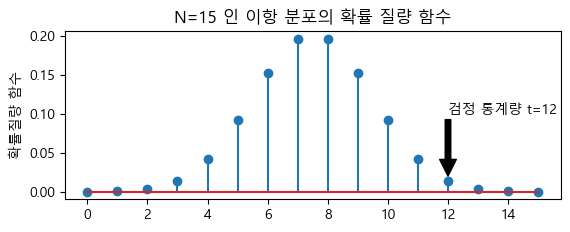

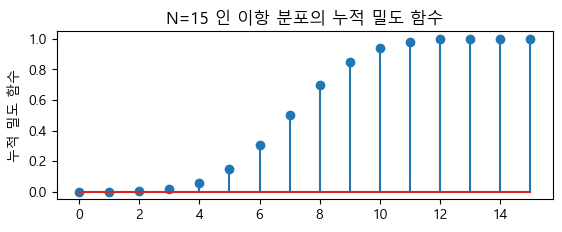

In [6]:
# 시행 횟수
N=15
# 앞면이 나올 확률
mu=0.5
# 이항 분포를 생성
rv=sp.stats.binom(N,mu)
xx=np.arange(N+1)
# 확률 질량 함수를 출력 (pmf)
# 각각이 나올 수 있는 확률에 대한 함수가 확률 질량 함수이다.
plt.subplot(211)
plt.stem(xx,rv.pmf(xx))
plt.ylabel('확률질량 함수')
plt.title('N=15 인 이항 분포의 확률 질량 함수')
plt.annotate('검정 통계량 t=12', xy=(12,0.02),xytext=(12,0.1),
             arrowprops={'facecolor':'black'})
plt.show()
# 12이 나올 확률
# print(rv.pmf(12-1))
# 이거 말고 누적 밀도함수(cdf)로 봐야한다.
plt.subplot(212)
plt.stem(xx,rv.cdf(xx))
plt.ylabel('누적 밀도 함수')
plt.title('N=15 인 이항 분포의 누적 밀도 함수')
plt.show()
# 유의 확률
x=2*(1-rv.cdf(12-1))
print(x) #0.035

In [10]:
# tdata.csv 파일의 성적을 읽어서 평균이 75점이라고 할 수 있는지 
# 유의 수준 5% 로 검정하자
items=pd.read_csv('./data/tdata.csv', encoding='cp949')
# items.head()
# 성적의 평균이 75라고 했을 떄의 유의 확률
result=sp.stats.ttest_1samp(items['성적'], popmean=75).pvalue
# print(result)
if result>=0.05:
    print("유의 확률이 유의 수준보다 크므로 귀무 가설 채택")
    print("평균은 75라고 할 수 있습니다.")
else:
    print("유의 확률이 유의 수준보다 작으므로 귀무 가설 기각")
    print("평균은 75라고 할 수 없습니다.")

유의 확률이 유의 수준보다 크므로 귀무 가설 채택
평균은 75라고 할 수 있습니다.


C:\Users\USER\AppData\Local\Temp\ipykernel_11632\1268579727.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x1,kde=False,fit=sp.stats.norm, label='1번 데이터 집단')
C:\Users\USER\AppData\Local\Temp\ipykernel_11632\1268579727.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x2,kde=False,

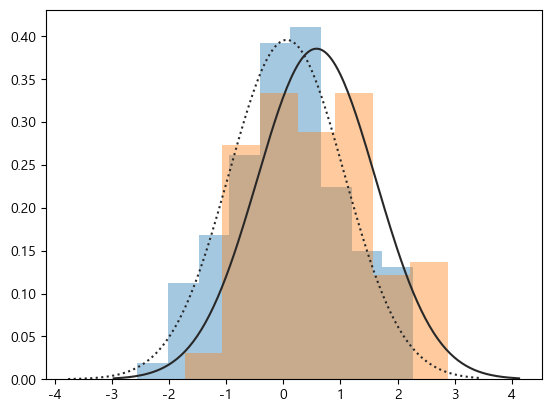

Ttest_indResult(statistic=-3.597192759749613, pvalue=0.00040634222594880954)


In [15]:
# 첫 번쨰 데이터 집단
N_1=100
mu_1=0
sigma_1=1
# 두 번쨰 데이터 집단
N_2=100
mu_2=0.5
sigma_2=1
# 데이터 생성
np.random.seed(0)
x1=sp.stats.norm(mu_1,sigma_1).rvs(N_1)
x2=sp.stats.norm(mu_2,sigma_2).rvs(N_2)
# print(x1)
# print(x2)
ax=sns.distplot(x1,kde=False,fit=sp.stats.norm, label='1번 데이터 집단')
ax=sns.distplot(x2,kde=False,fit=sp.stats.norm, label='2번 데이터 집단')
ax.lines[0].set_linestyle(":")
plt.show()
print(sp.stats.ttest_ind(x1,x2,equal_var=False))
# 유의 확률이 0.684
# 유의 수준을 얼마로 지정하더라고 귀무 가설을 기각할 수 없음
# 분명히 평균이 0과 0.5 다른데도 두 집단의 평균이 같다는 유의확률이 0.684
# 귀무 가설이 거짓인데 참이라고 나왔습니다.
# 이런 경우를 2종 오류라고 하며, 원인은 대부분 데이터 개수의 부족

In [17]:
# 서로 다른 수면제를 복용한 경우,
# 약의 효과가 다른지 여부를 판단해보자.
# pvalue가 0.05보다 크다면 귀무가설 채택
# 채택한다면 두개의 평균은 같다.
x1=np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2=np.array([1.9,0.8, 1.1, 0.1, -0.1, 4.5, 5.5, 1.6, 4.6, 3.4])
r=sp.stats.ttest_ind(x1,x2, equal_var=True)
# print(r)
if r.pvalue>=0.05:
    print("유의 확률이 유의 수준보다 크므로 귀무 가설 채택")
    print("두 수면제의 평균은 같다.")
else:
    print("유의 확률이 유의 수준보다 작으므로 귀무 가설 기각")
    print("두 수면제의 평균은 다르다.")

유의 확률이 유의 수준보다 크므로 귀무 가설 채택
두 수면제의 평균은 같다.


In [19]:
# 동일한 집단에게 수면제1과 2를 복용시켰을 때, 수면 시간의 변화
x1=np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2=np.array([1.9,0.8, 1.1, 0.1, -0.1, 4.5, 5.5, 1.6, 4.6, 3.4])
r=sp.stats.ttest_rel(x1,x2)
print(r)

TtestResult(statistic=-4.103994576711355, pvalue=0.002660774200843549, df=9)


In [36]:
# 윌콕슨의 부호 순위 검정
training_rel=pd.read_csv('./data/training_rel.csv')
training_rel.head()
# 데이터 6개 복제
toy_df=training_rel[:6].copy()
# print(toy_df)
# 2개 데이터의 차이를 구하기
toy_df['차']=toy_df['후']-toy_df['전']
# print(toy_df)
# 차의 절대값을 가지고 순위를 구하자.
toy_df['순위']=sp.stats.rankdata(abs(toy_df['차'])).astype(int)
print(toy_df)
# 차이가 음수일 때와 양수일 떄의 순위 합 구하기
r_minus=np.sum((toy_df['차']<0)*toy_df['순위'])
r_plus=np.sum((toy_df['차']>0)*toy_df['순위'])
print(r_minus,r_plus)
# 2개의 값 중에 작은쪽이 검절 통계량 : 8
# 이 값과 임계값(직접 설정한 값)과 비교해서
# 임계값 보다 작은 경우에 귀무 가설이 기각되는 단측검정

    전   후   차  순위
0  59  41 -18   5
1  52  63  11   3
2  55  68  13   4
3  61  59  -2   1
4  59  84  25   6
5  45  37  -8   2
8 13


In [39]:
data=[41,30,51,71,61]
# 카이제곱검정을 수행
print(sp.stats.chisquare(data))
# 유의 수준을 5%로 설정하면 유의 수준이 유의 확률보다 크기에
# 선호도의 차이가 있다라고 해석
# 평균을 가지고 있는 검정과 분산을 가지고 하는 검정은 겨로가 해석을 반대로 합니다.

Power_divergenceResult(statistic=20.488188976377952, pvalue=0.00039991784008227264)


In [6]:
# 붓꽃 데이터 가져오기
from sklearn.datasets import load_iris\
# 항상 sklearn의 데이터는 data 속성에 feature가 존재하고
# target에 target이 존재합니다.
iris=load_iris()
# print(iris)
# 벡터는 하나의 행
# 가로나 세로 방향으로 여러 개의 스칼라 데이터가 모이면 벡터
# 여러 개의 데이터 묶음에서 하나의 데이터를 선택한 경우를 특징 벡터(Feature Vector)
print(iris.data[0,:])
# 스칼라
print(iris.data[0,0])
# sklearn에서는 벡터를 대입할 때, 열 개수가 1개인 2차원 배열 객체를 대입해야 함
x1=np.array([5.1,3.5,1.4,0.2])
print(x1)
# skearn에서는 위의 경우 아래처럼 생성해서 대입
x1=np.array([[5.1],[3.5],[1.4],[0.2]])
print(x1)
# 2차원 벡터가 들어오더라도 ML에서는 1차원으로 변환해서 사용함

[5.1 3.5 1.4 0.2]
5.1
[5.1 3.5 1.4 0.2]
[[5.1]
 [3.5]
 [1.4]
 [0.2]]


(8, 8)


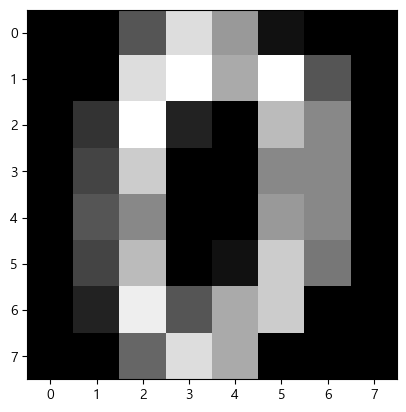

In [15]:
# 흑백 이미지 1개는 Matrix
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.images[0].shape)
plt.imshow(digits.images[0], cmap='gray')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9320\1271447640.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_rgb=misc.face()


(768, 1024, 3)


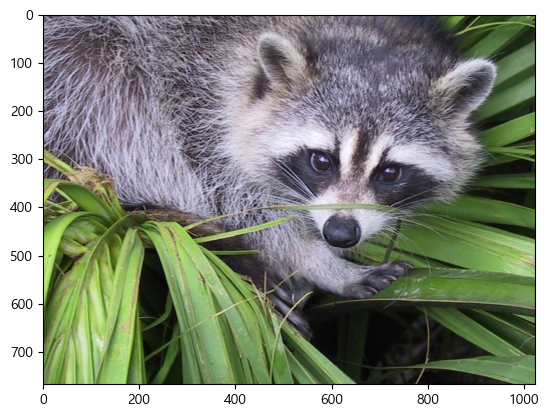

In [18]:
# 컬러 이미지
from scipy import misc
img_rgb=misc.face()
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

In [23]:
ar=np.array([[1,2,3],[4,5,6]])
print(ar)
print(ar.T)
print(ar.transpose())
# 2차원 배열에서는 t랑 traspose 결과가 같음
# 3차원의 경우는 순서를 정해서 
arr=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(arr)
print(arr.T)
print(arr.transpose(2,1,0))
print(arr.transpose(1,0,2))

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[[1 5]
  [3 7]]

 [[2 6]
  [4 8]]]
[[[1 5]
  [3 7]]

 [[2 6]
  [4 8]]]
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]


In [30]:
from scipy import sparse
# 대각 행렬 (대각선으로만 1이 있는 행렬)을 만드는데
# 기준선은 하나 위로 설정합니다.
ar=np.eye(3,k=1)
print(ar)
# 희소 행렬로 변환
# 희소 행렬은 한눈에 알아보기가 어렵다.]]
sp=sparse.csr_matrix(ar)
print(sp)
# 밀집 행렬로 변환
print(sp.toarray())

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
  (0, 1)	1.0
  (1, 2)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [33]:
# 스칼라, 벡터, 행렬의 산술 연산
# 동일한 차원의 벡터 간의 산술 연산 
# - shape가 같아야 합니다.
x=np.array([10,11,12,13,14])
y=np.array([20,13,22,11,23])
print(x+y)
# 다른 차원의 벡터 간의 산술 연산
# - shape가 다르면 작은 쪽의 shape를 큰 쪽에 맞추어 계산
print(x+5)
# 벡터와 행렬의 계산
# 벡터의 데이터 개수와 행렬의 열의 개수가 같아야 가능합니다.
ar=np.array([1,2,3])
matrix=np.array([[6,7,8],[16,17,18]])
# - shape가 다르면 작은 쪽의 shape를 큰 쪽에 맞추어 계산
print(ar+matrix)

[30 24 34 24 37]
[15 16 17 18 19]
[[ 7  9 11]
 [17 19 21]]


In [39]:
# 벡터의 내적
x=np.array([1,2,3])
y=np.array([4,5,6])
# 일차원 배열은 전치를 하지 않아도 내적 계산 가능
print(np.dot(x,y))
print(x@y)
# 벡터의 내적은 행과 열의 개수가 크로스 방향으로 같을 때 가능함
print(x.T@y)
x=np.array([[1],[2],[3]])
y=np.array([[4],[5],[6]])
# print(np.dot(x,y)) # 오류
# 내적을 할 때는 한 쪽을 전치해줘야 한다.
print(np.dot(x.T, y))

32
32
32
[[32]]


In [42]:
score=np.array([90,70,85])
# 단순한 평균
print(score.mean())
# 학점이 3,2,3 학점일 때, 그냥 평균으로 처리해야 할까?
# 이럴 때 쓰는 것이 가중합이다.
# 가중 평균 구하기
su=np.array([3,2,3])
print(score@su / 8)

81.66666666666667
83.125


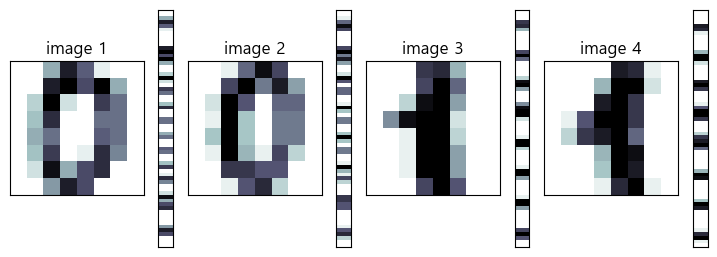

In [57]:
# 이미지의 유사도 계산
from sklearn.datasets import load_digits
import matplotlib.gridspec as GridSpec
digits=load_digits()
# print(digits)
# 이미지 가져오기
# 숫자 0
d1=digits.images[0]
d2=digits.images[10]
# 숫자 1
d3=digits.images[1]
d4=digits.images[11]
# 이미지 데이터 - 2차원이지만 이를 일차원으로 만들자.
v1=d1.reshape(64,1)
v2=d2.reshape(64,1)
v3=d3.reshape(64,1)
v4=d4.reshape(64,1)
plt.figure(figsize=(9,9))
gs=gridspec.GridSpec(1,8, height_ratios=[1], width_ratios=[9,1,9,1,9,1,9,1])
for i in range(4):
    plt.subplot(gs[2*i])
    # 원본 이미지 출력
    plt.imshow(eval("d"+str(i+1)),aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i+1))
    plt.subplot(gs[2*i+1])
    plt.imshow(eval("v"+str(i+1)),aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [60]:
# 유사도 계산하기
# 1차원으로 하면 값이 하나로 나옴
print(d1.T@d2)
print(v1.T@v2) # 내적이 가장 큼
print(v1.T@v3)
print(v1.T@v4)
print('==============')
print(v3.T@v1)
print(v3.T@v2)
print(v3.T@v4) # 내적이 가장 큼

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]
 [0.000e+00 3.400e+01 2.800e+02 1.100e+02 2.400e+01 1.630e+02 1.110e+02
  0.000e+00]
 [0.000e+00 8.500e+01 1.058e+03 7.660e+02 4.080e+02 8.110e+02 4.060e+02
  0.000e+00]
 [0.000e+00 4.000e+00 2.830e+02 5.670e+02 5.340e+02 4.600e+02 1.080e+02
  0.000e+00]
 [0.000e+00 1.000e+00 2.650e+02 4.660e+02 4.460e+02 3.800e+02 6.300e+01
  0.000e+00]
 [0.000e+00 7.800e+01 9.500e+02 6.310e+02 2.670e+02 7.080e+02 3.610e+02
  0.000e+00]
 [0.000e+00 6.300e+01 5.510e+02 2.590e+02 4.700e+01 3.470e+02 2.510e+02
  0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]]
[[3064.]]
[[1866.]]
[[1883.]]
[[1866.]]
[[2421.]]
[[3661.]]


In [61]:
a=np.array([[1,2,3],[4,5,6]]) #2x3
b=np.array([[1,2],[3,4],[5,6]]) # 3x2
# 결과물은 2x2
print(np.dot(a,b))

[[22 28]
 [49 64]]


In [62]:
ar=np.array([[1,2,3],[4,5,6],[7,8,9]])
i=np.eye(3)
print(ar@i)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [63]:
ar=np.array([[1,2,3],[4,5,6],[7,8,9]])
v=np.array([1,2,3])
print(ar@v.T)

[14 32 50]


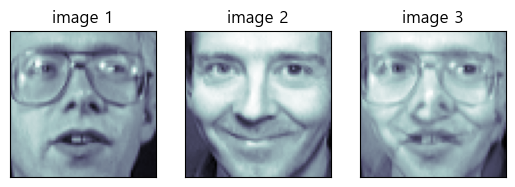

In [71]:
# 행렬과 벡터의 곱셈을 이용한 이미지 모핑(Morphing)
#얼굴 이미지 데이터 가져오기
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()
f,ax=plt.subplots(1,3)
new_face=0.51*faces.images[13]+0.49*faces.images[26]
ax[0].imshow(faces.images[13],cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1")
ax[1].imshow(faces.images[26],cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2")
ax[2].imshow(new_face,cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3")
plt.show()

In [72]:
# 잔차 제곱합 구하기
x=np.array([1,2,3])
A=np.arange(1,10).reshape(3,3)
# 잔차 제곱합
print(x.T@A@x)

228


In [74]:
vector=np.eye(3)
print(vector)
print(np.trace(vector))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
3.0


In [75]:
# 행렬식
mat=np.array([[1,2],[3,4]])
print(np.linalg.det(mat))

-2.0000000000000004


In [78]:
# 역행렬 구하기
a=np.array([[1,2],[3,4]])
inv=np.linalg.inv(a)
print(inv)
print(a.T@inv)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[ 2.50e+00 -5.00e-01]
 [ 2.00e+00  2.22e-16]]
